In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(patchwork)
    theme_set(theme_cowplot())
})
options(repr.plot.width=16,repr.plot.height=10)

# Composing multiple plots in a single page

In [5]:
p1 <- ggplot(mtcars) + geom_point(aes(mpg, disp)) + ggtitle('Plot 1')
p2 <- ggplot(mtcars) + geom_boxplot(aes(gear, disp, group = gear)) + ggtitle('Plot 2')

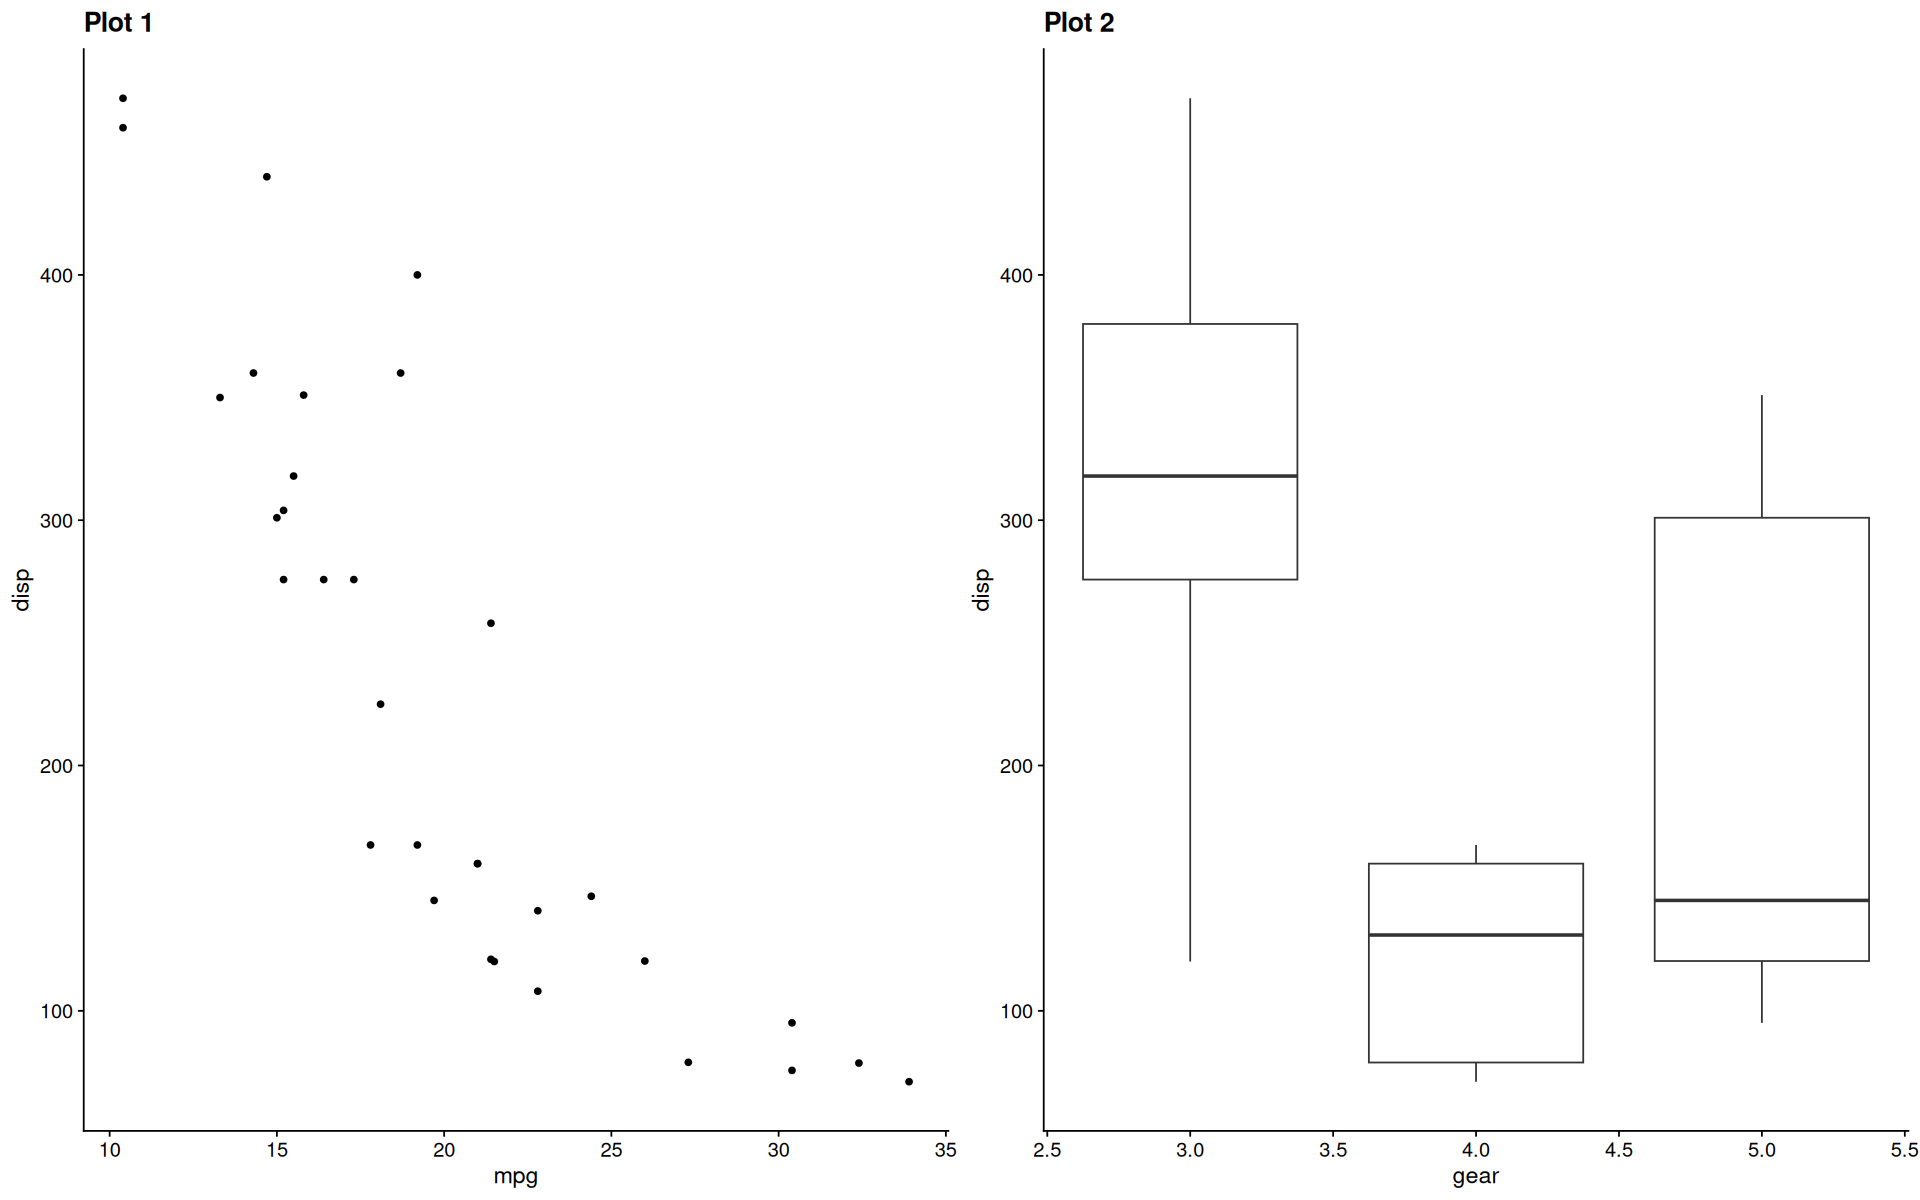

In [6]:
# from cowplot
plot_grid(p1,p2)

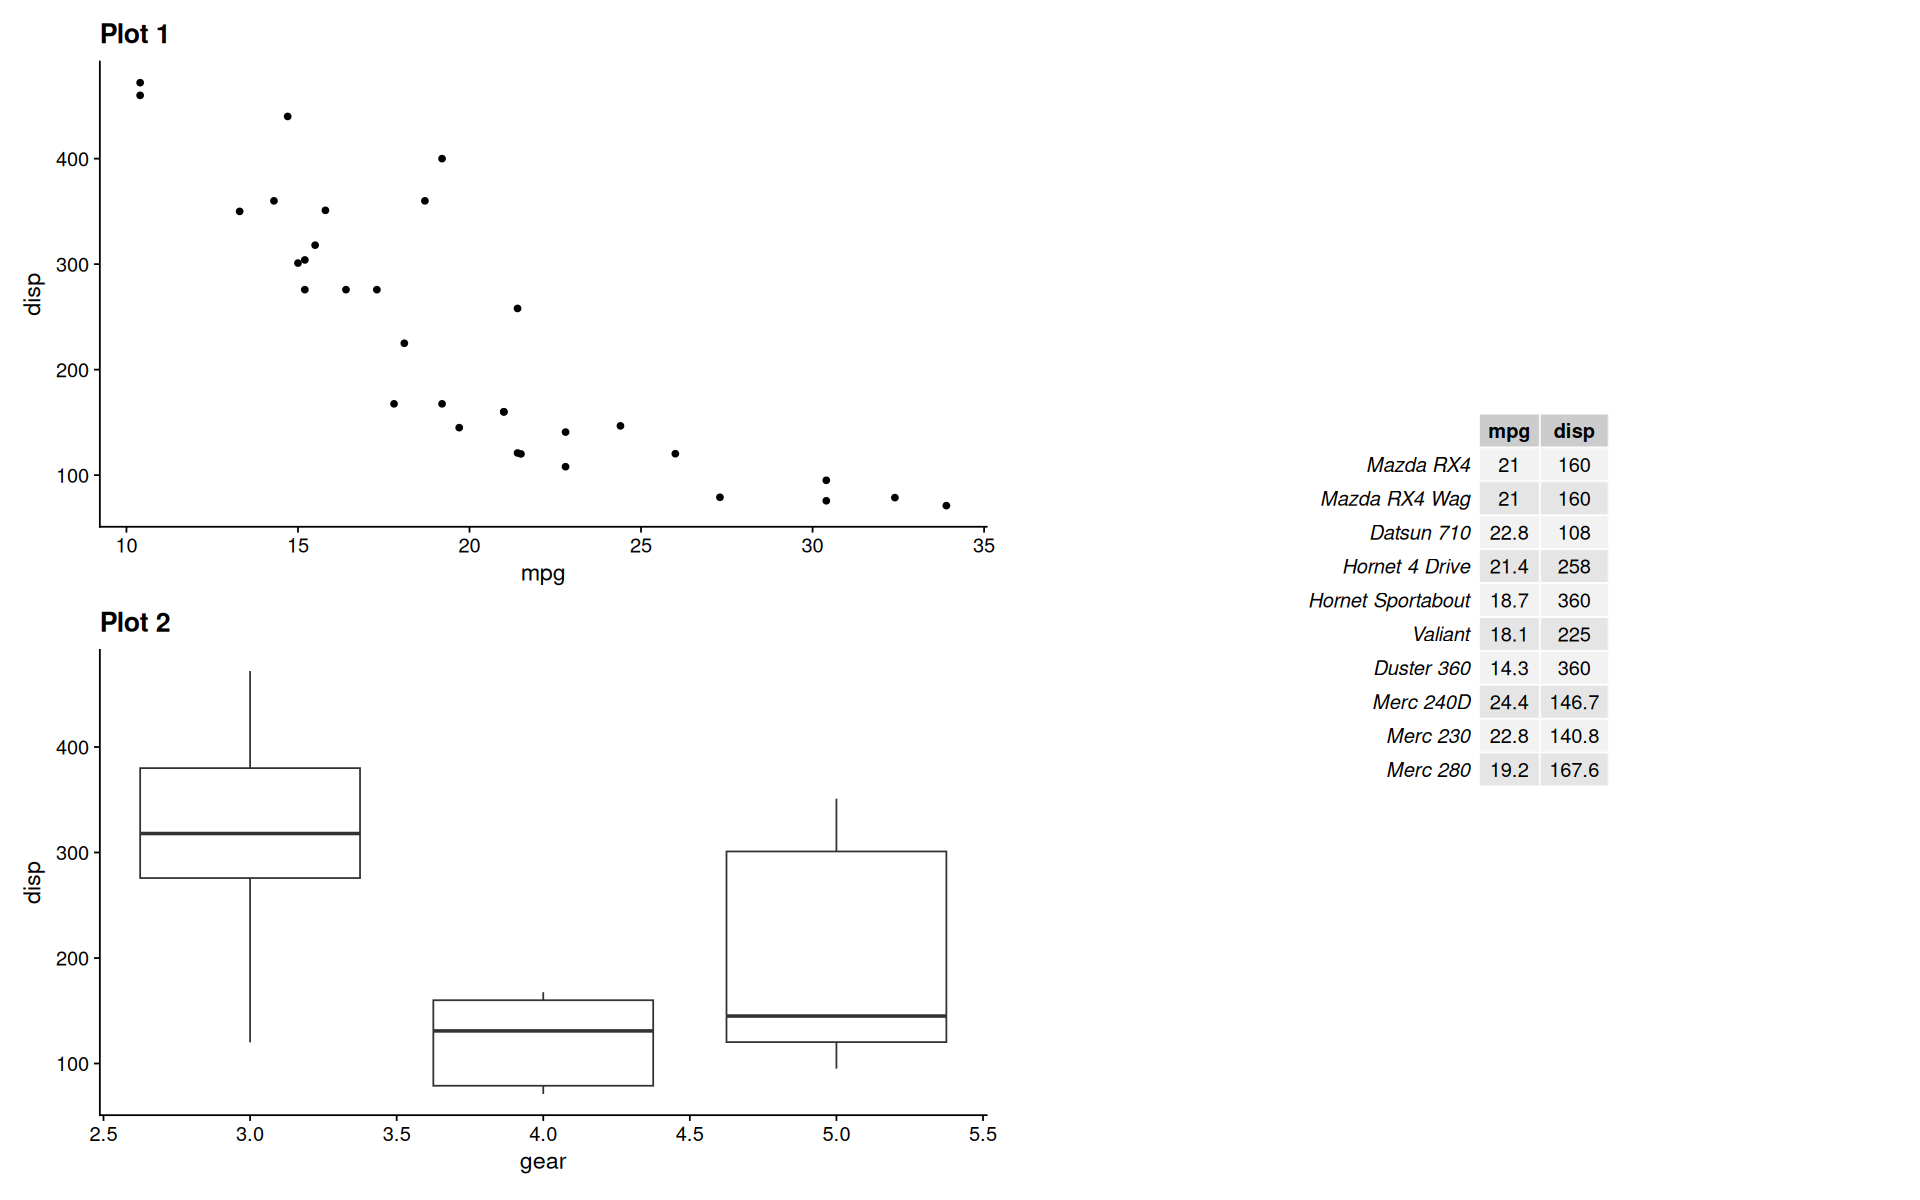

In [8]:
# with patchwork
(p1 / p2) | gridExtra::tableGrob(mtcars[1:10, c('mpg', 'disp')])

# Inset plots and tables

In [12]:
library(ggpp)

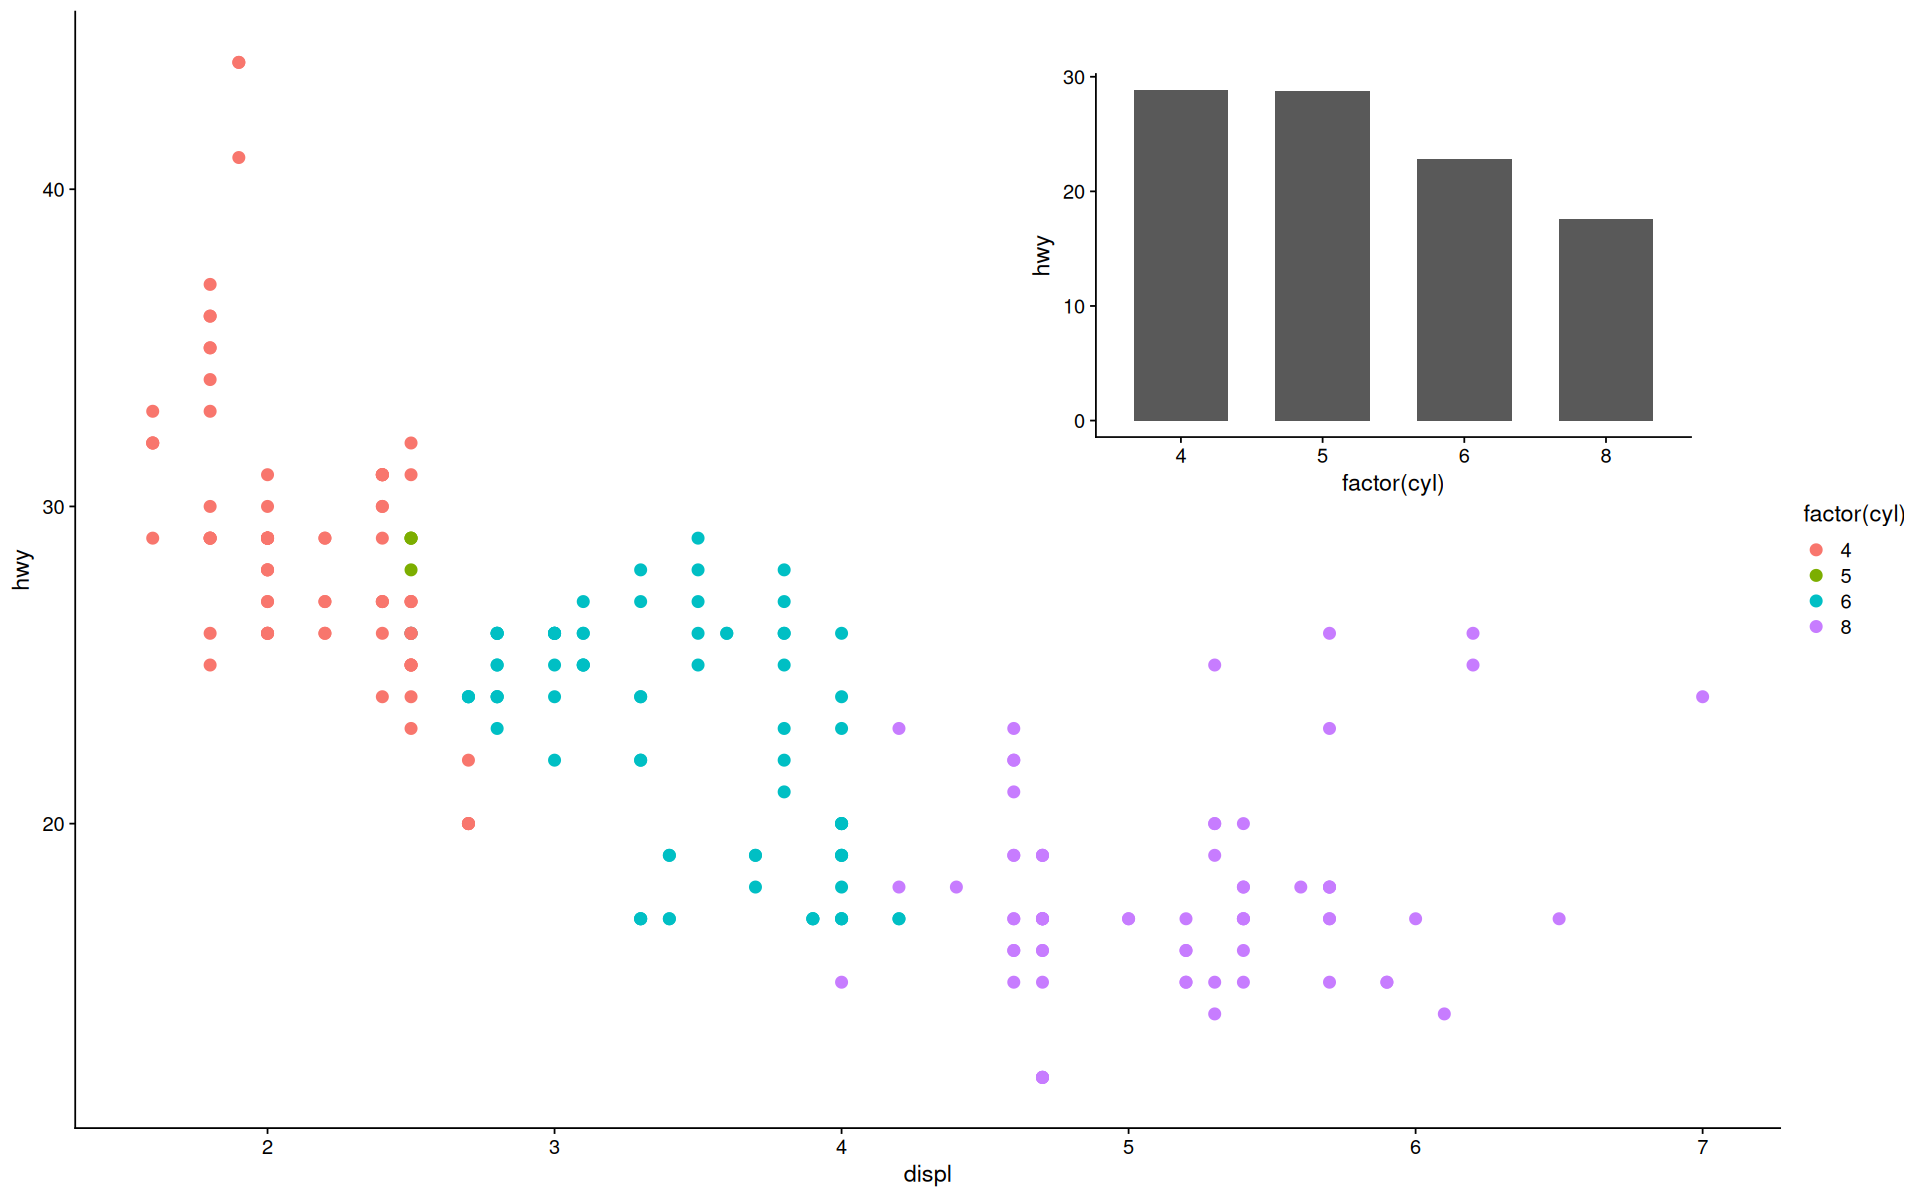

In [14]:
p <- ggplot(mpg, aes(factor(cyl), hwy)) +
  stat_summary(geom = "col", fun = mean, width = 2/3) 

ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) +
  annotate("plot", x = 7, y = 44, label = p) +
  geom_point(size=3) 

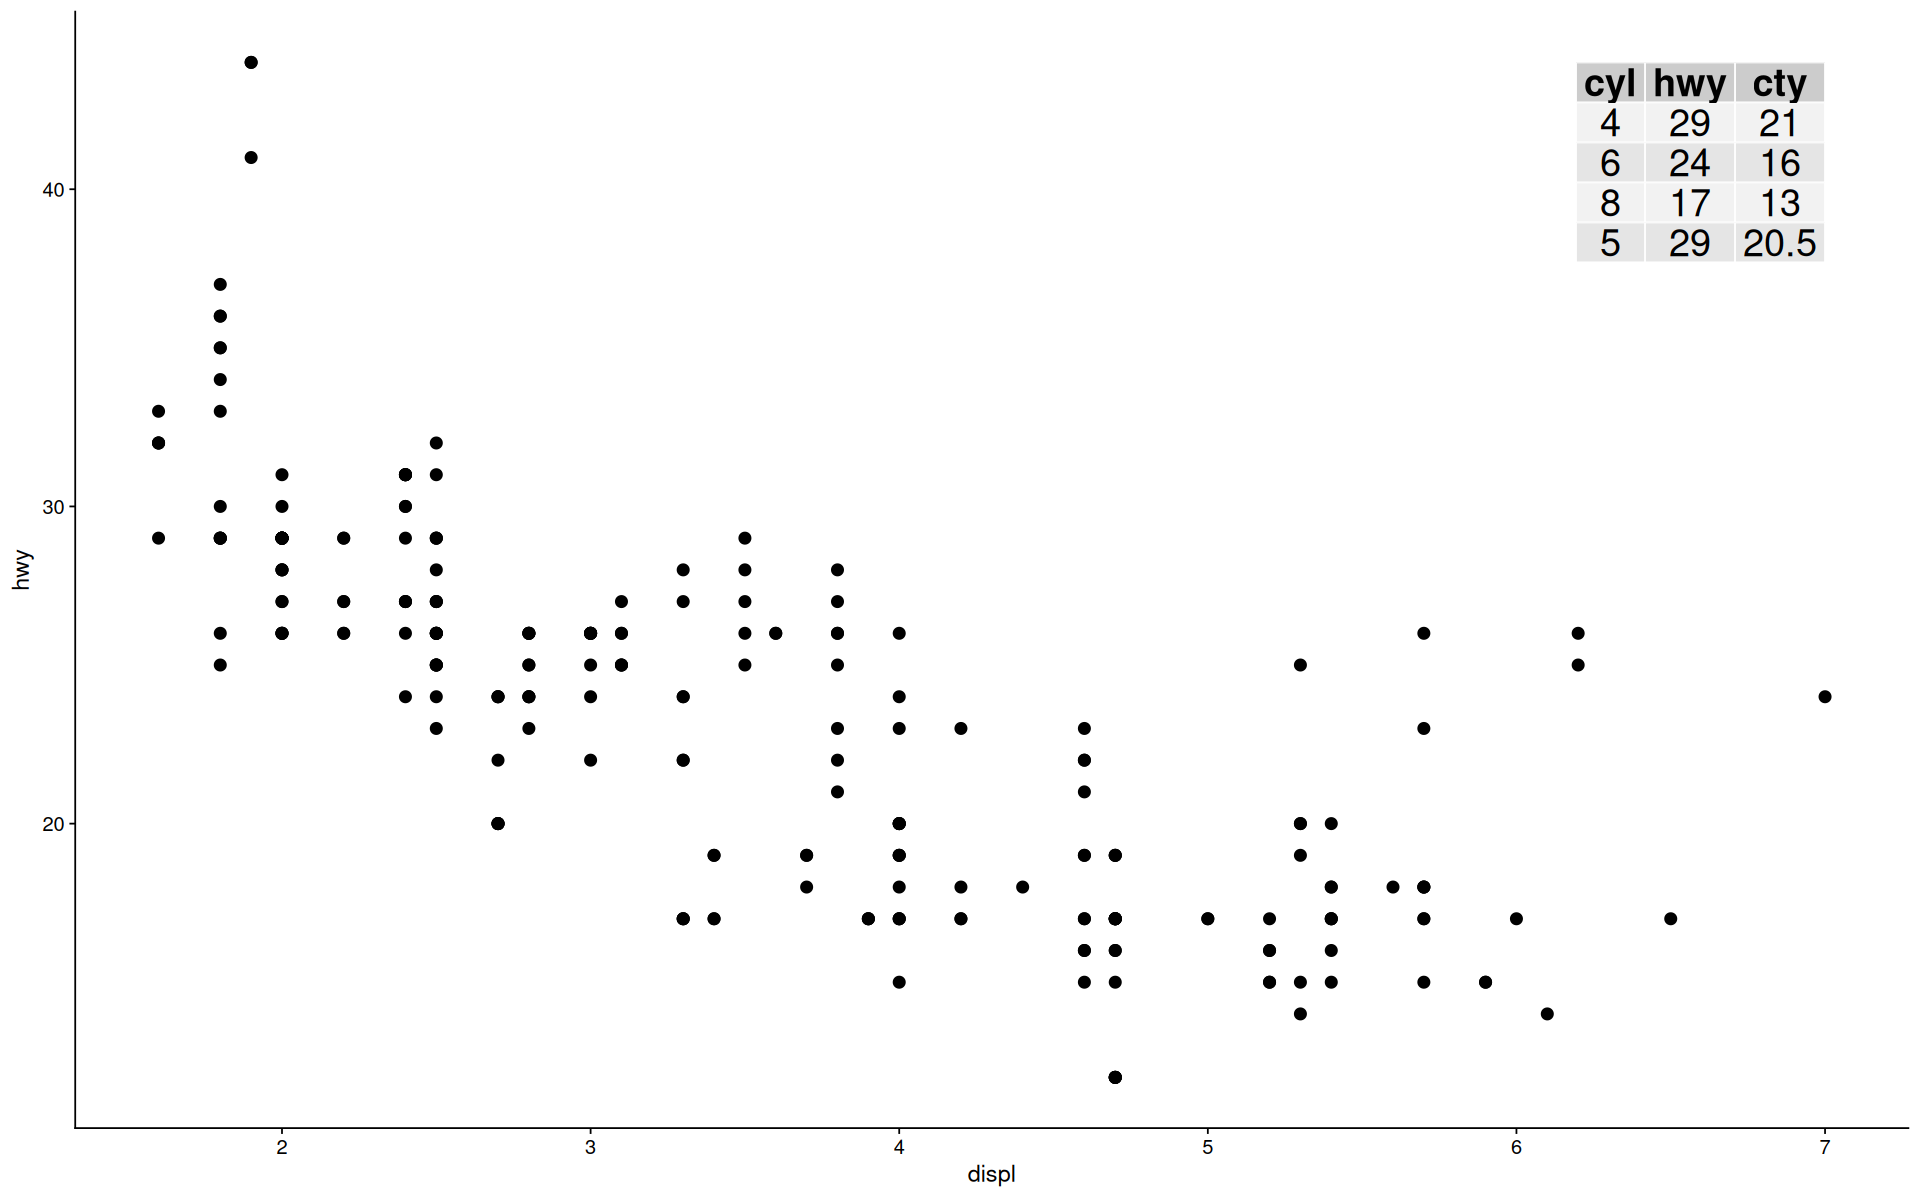

In [13]:
stb <- summarise(mpg, hwy = median(hwy), cty = median(cty), .by=cyl)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(size=3) +
  annotate("table", x = 7, y = 44, label = stb, size=8)

# Plot zoom

In [15]:
library(ggforce)

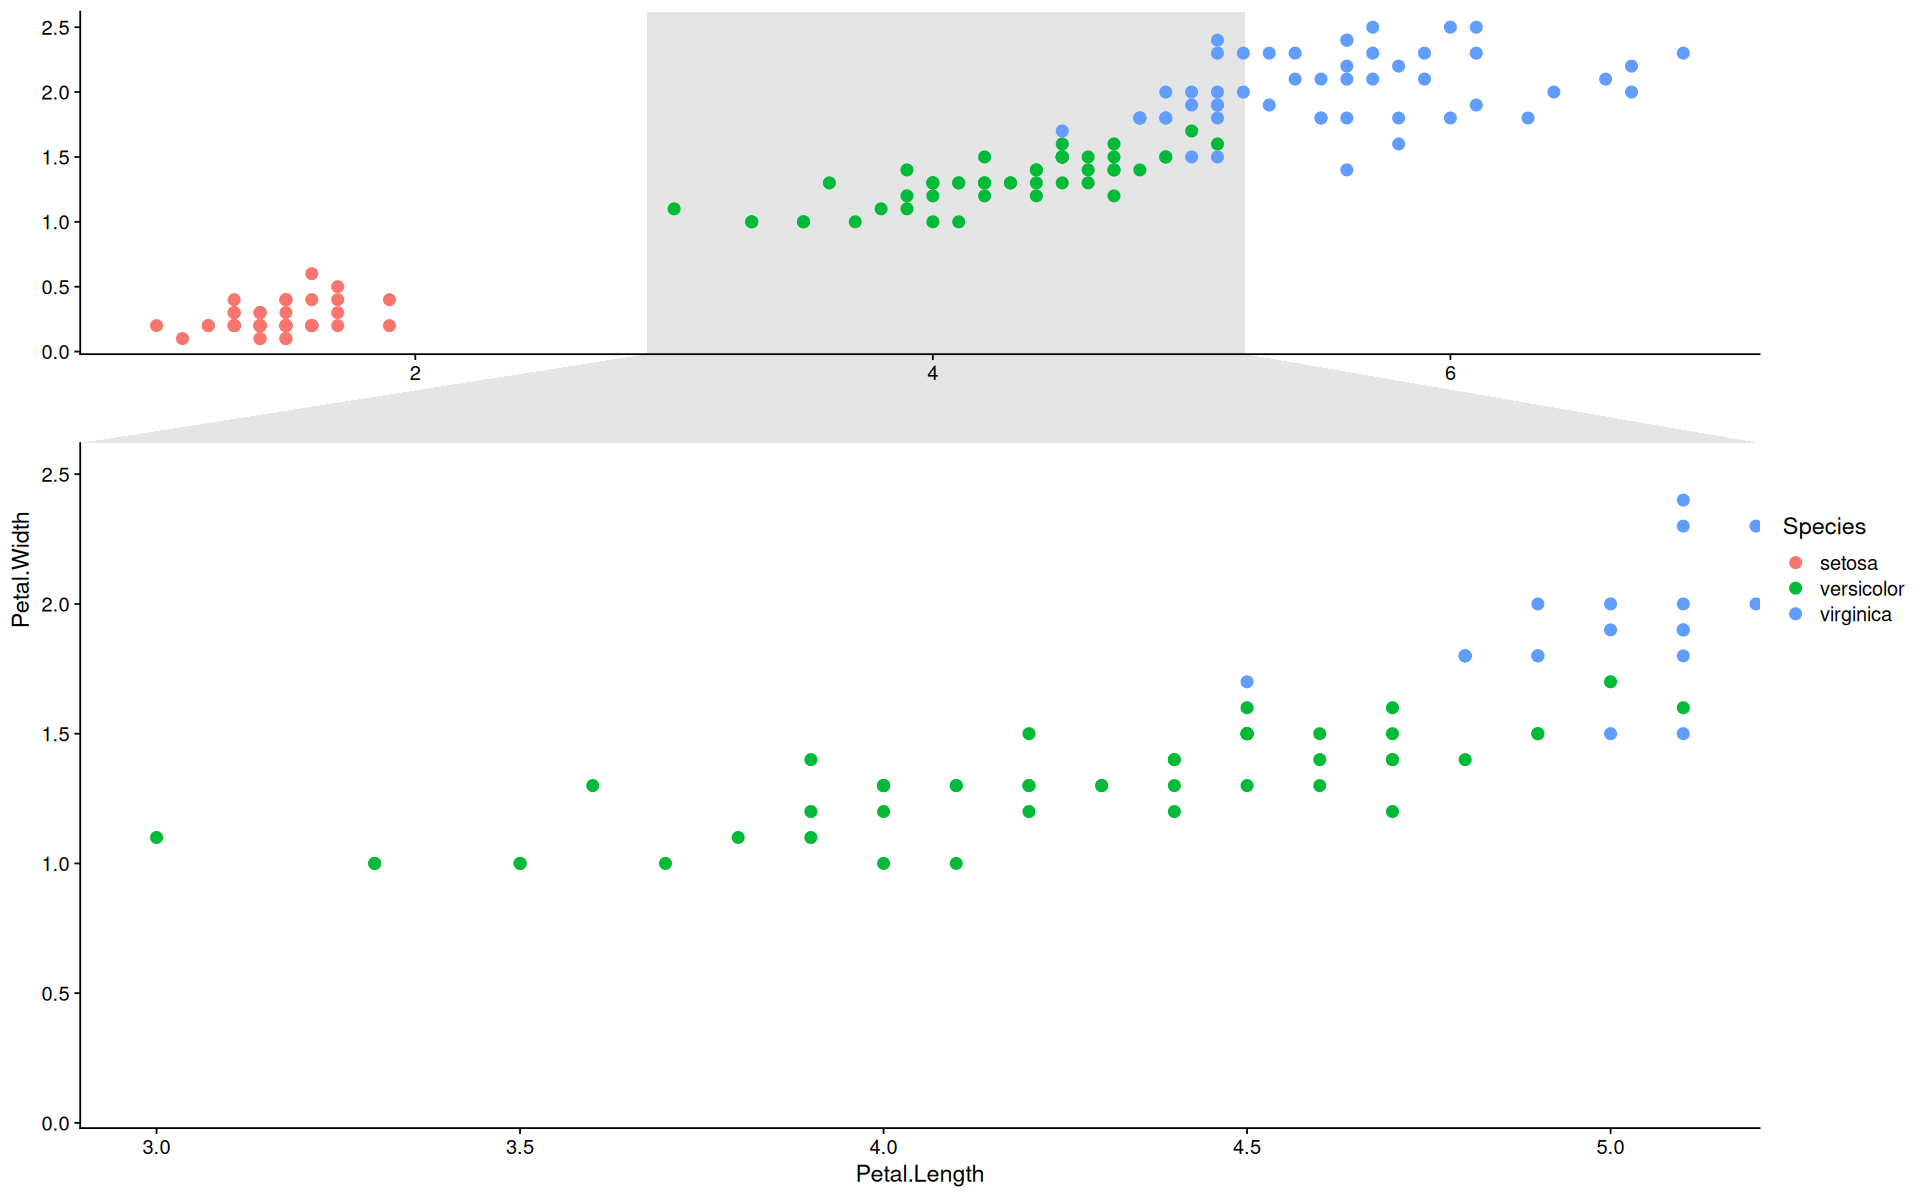

In [16]:
ggplot(iris, aes(Petal.Length, Petal.Width, colour = Species)) +
  geom_point(size=3) +
  facet_zoom(x = Species == "versicolor")